# Task 5: Exploratory Data Analysis- Sports
    

 ● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

In [117]:
# Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
matches_data = pd.read_csv("matches.csv")
score_data = pd.read_csv("deliveries.csv")           

In [119]:
matches_data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [120]:
score_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [121]:
# DATA INFORMATION
print(matches_data.info())
print(score_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [122]:
matches_data["umpire3"].isnull().sum()

637

In [123]:
matches_data["umpire3"].tail(10)

746              Nanda Kishore
747      KN Ananthapadmanabhan
748                Nitin Menon
749               Ulhas Gandhe
750             Bruce Oxenford
751                     S Ravi
752                  Ian Gould
753                        NaN
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, dtype: object

In [124]:
matches_data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [125]:
# Matches we have got in the dataset 
matches_data['id'].max()

11415

In [126]:
# Seasons we have got in the dataset
matches_data['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

Team won by Maximum Runs

In [127]:
matches_data.iloc[matches_data['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [128]:
matches_data.iloc[matches_data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

Team won by maximum wickets

In [129]:
matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

Team won by Maximum runs

In [130]:
matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']


'Mumbai Indians'

Team won by Minimum Wickets

In [131]:
matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
Season                          IPL-2015
city                             Kolkata
date                          09-05-2015
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

# Season which had most number of matches

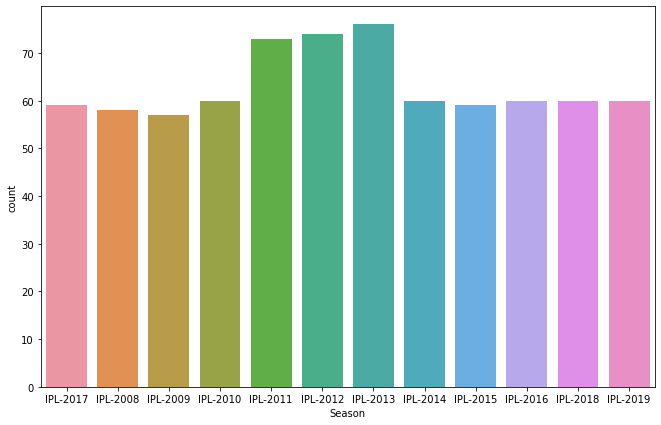

In [132]:
plt.figure(figsize=(11,7))
sns.countplot(x='Season', data=matches_data)
plt.show()

In 2013 we had the most number of matches

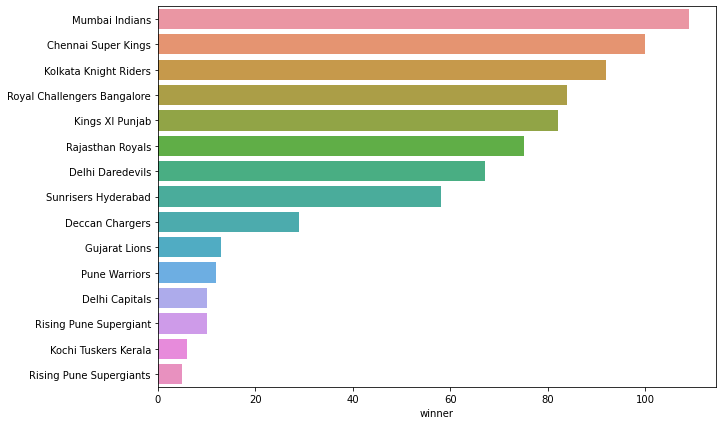

In [133]:
plt.figure(figsize=(10,7))
data = matches_data.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

As we can see Mumbai Indians are the winners in most of the matches

# Venue which has hosted most number of IPL matches .

Text(0.5, 0, 'Frequency')

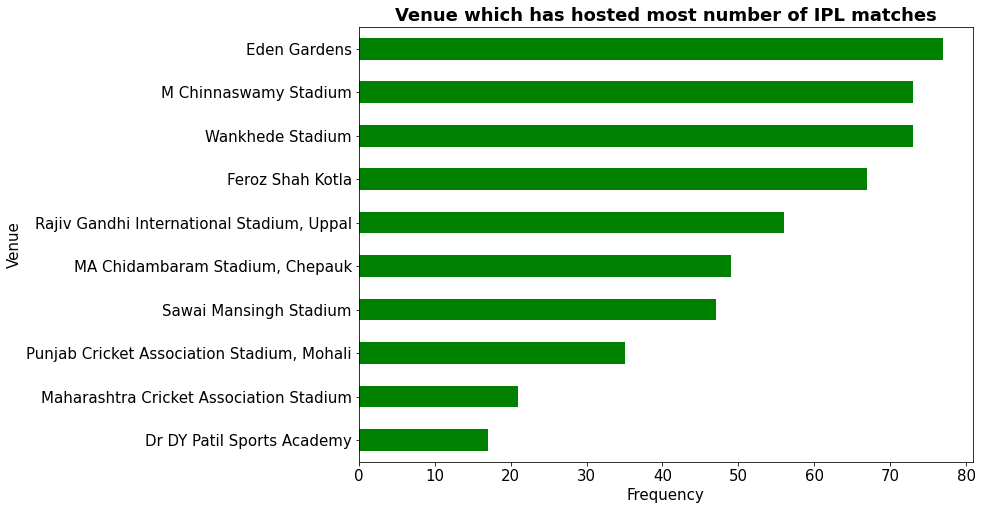

In [134]:
matches_data.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(11,8), fontsize=15, color='green')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 15)
plt.xlabel("Frequency", size = 15)

Eden Garden and Wankhede stadium has hosted most number of IPL matches

# Number of Wins per team

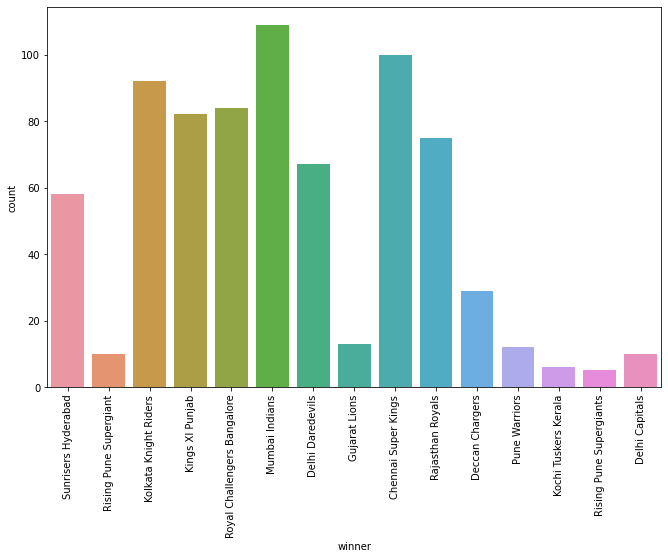

In [135]:
plt.figure(figsize=(11,7))
sns.countplot(x='winner', data=matches_data)
plt.xticks(rotation=90)
plt.show()

MI leads along with CSK.

# Teams decision to choose bat or field after winning toss

Text(0, 0.5, 'Count')

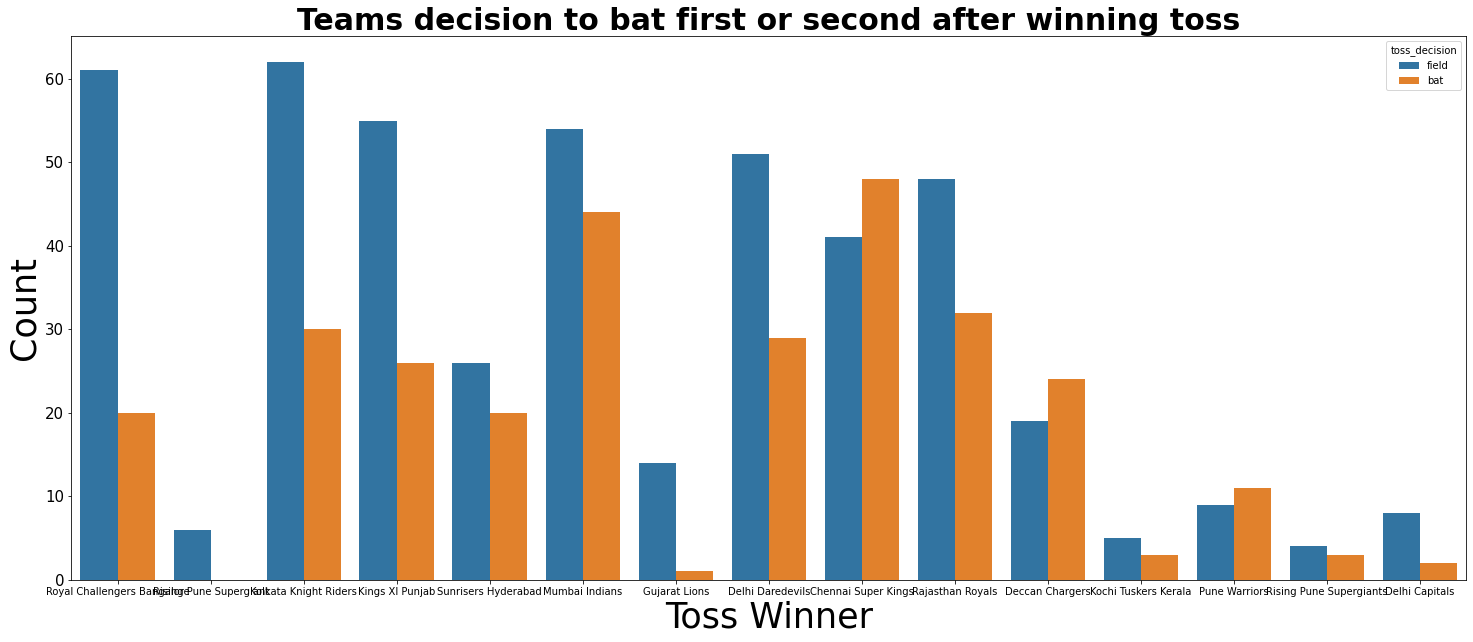

In [144]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = matches_data, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

CSK who has mostly choosen to bat first.

# Which player's performance has mostly led team's win?

Text(0.5, 0, 'Players')

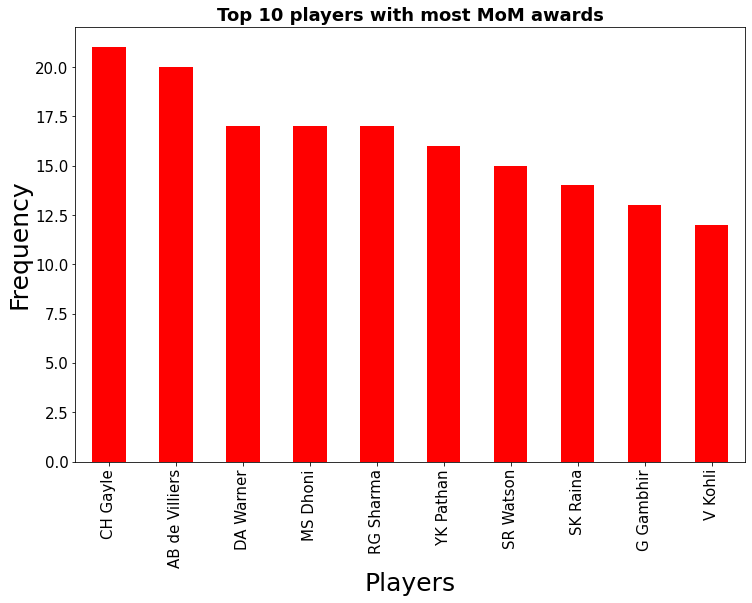

In [137]:
mom= matches_data['player_of_match'].value_counts()
mom.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='red')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

Chris Gayle has so far won the most number of Man of the Match awards followed AB de Villiers

# Let's see batsman analysis

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

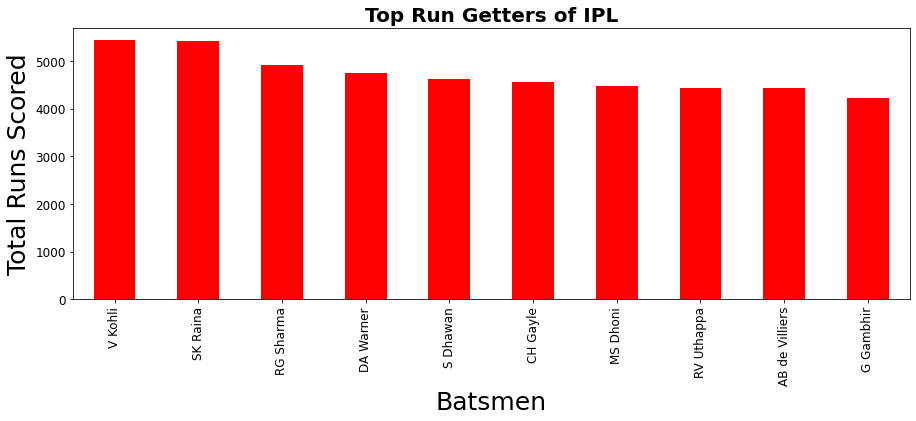

In [138]:
batsman=score_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'red',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

Virat Kohli is leading the chart closely by Suresh Raina

# Batsman with most number of boundaries

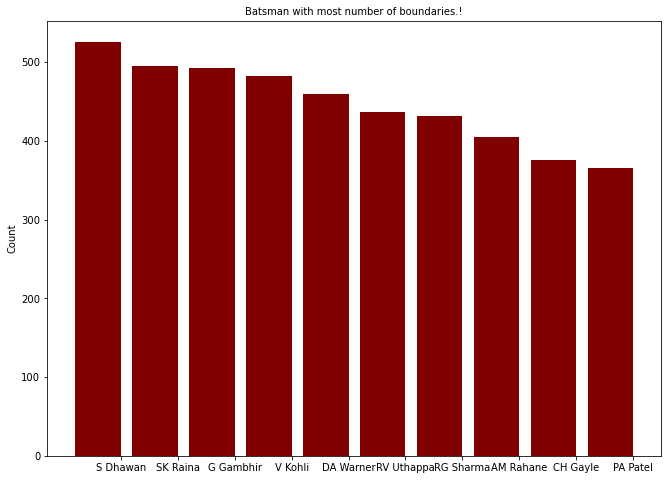

In [139]:
batsman_bound = score_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_bound = batsman_bound.iloc[:10,:]

labels = np.array(batsman_bound['batsman'])
ind = np.arange(len(labels))
width = 0.8
fig, ax = plt.subplots(figsize=(11,8))
rects = ax.bar(ind, np.array(batsman_bound['batsman_runs']), width=width, color='maroon')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='horizontal')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
plt.show()

Shikhar Dhawan is leading the chart.

# Batsman with most number of sixes

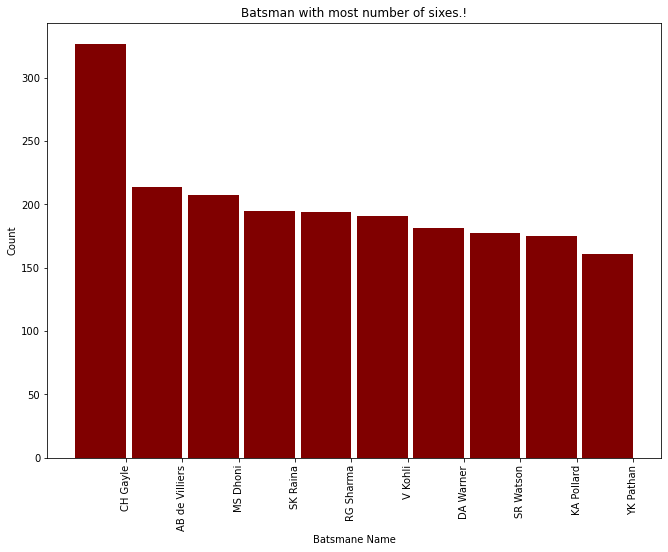

In [140]:
batsman_bound = score_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_bound = batsman_bound.iloc[:10,:]

labels = np.array(batsman_bound['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(11,8))
rects = ax.bar(ind, np.array(batsman_bound['batsman_runs']), width=width, color='maroon')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsmane Name')
plt.show()

 And as we all know Chris Gayle has scored most number of sixes in IPL.

# Bowlers who has bowled most number of balls in IPL

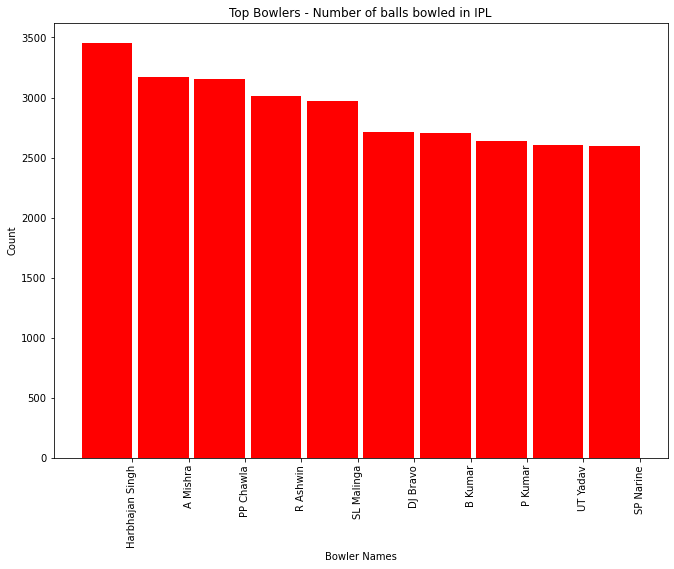

In [141]:
bow_data = score_data.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
bow_data = bow_data.iloc[:10,:]

labels = np.array(bow_data['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(11,8))
rects = ax.bar(ind, np.array(bow_data['ball']), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
plt.show()

Harbhajan Singh is bowler with most number of balls bowled in IPL.

# Bowlers who has bowled more number of extras in IPL

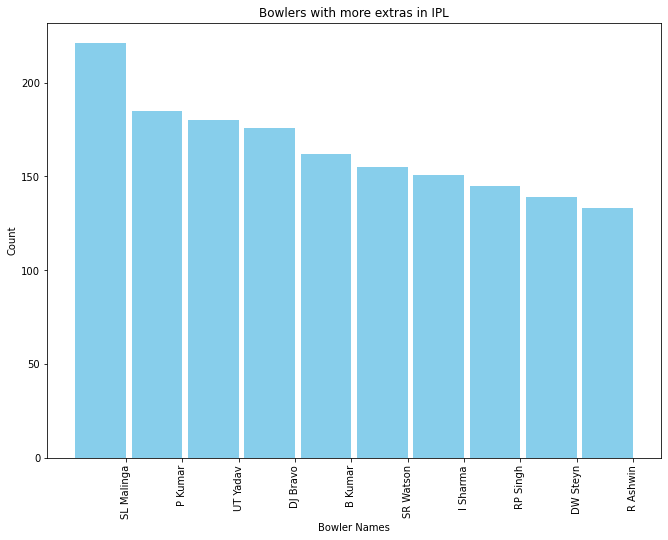

In [142]:
bow_data = score_data.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
bow_data = bow_data.iloc[:10,:]

labels = np.array(bow_data['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(11,8))
rects = ax.bar(ind, np.array(bow_data['extra_runs']), width=width, color='skyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
plt.show()


Malinga is leading the chart followed by Pravin kumar

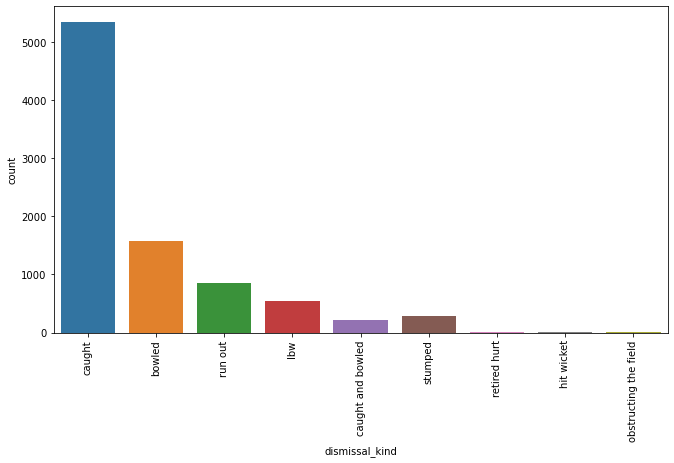

In [143]:
# Now let us see most common dismissal types in IPL.
plt.figure(figsize=(11,6))
sns.countplot(x='dismissal_kind', data=score_data)
plt.xticks(rotation='vertical')
plt.show()

# Thank you so much for Viewing this notebook